![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customers=pd.read_csv('files_for_lab/customer_churn.csv')
customers.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
 #i will make this a categorical since it looks like you are or not a senior citizen
customers["SeniorCitizen"] = customers["SeniorCitizen"].astype("object")
customers["SeniorCitizen"].dtype

dtype('O')

In [5]:
customers = customers[["tenure","SeniorCitizen","MonthlyCharges","Churn"]]
customers

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [6]:
customers["Churn"].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [48]:
# transforming the target to numerical with 1 and 0
def transform_churn(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
customers["Churn"] = list(map(transform_churn,customers["Churn"]))
customers.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,0
3,45,0,42.30,0
4,2,0,70.70,0


In [8]:
# split data into features and target
X = customers.drop("Churn",axis=1)
y = customers["Churn"]


In [9]:
# look for any cleaning
print(y.value_counts(dropna=False))
print(X.isna().sum())

0    5174
1    1869
Name: Churn, dtype: int64
tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7928\3848393390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = X.corr()


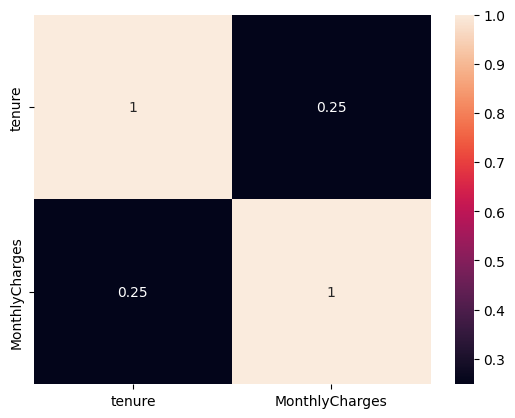

In [10]:
# checking for multicolinearity  // nothing to worry about looks like
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot = True)
plt.show()

In [11]:
# train test split before the scaling process
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y) # default fraction is .2

In [12]:
# separating categorical and numerical 
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

### Normalizing


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include=np.number)

#Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns = X_num.columns)
X_train_norm

,tenure,MonthlyCharges
0,0.750000,0.468159
1,0.388889,0.723881
2,0.319444,0.682090
3,0.333333,0.391542
4,0.666667,0.987065
...,...,...
5277,0.708333,0.689552
5278,0.458333,0.353234
5279,0.666667,0.601990
5280,0.333333,0.749254


### One hot encoding


In [14]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# we will reuse encoder and cols when encoding the X_test_cat
X_train_cat = pd.DataFrame(encoded_cat, columns=cols)
X_train_cat

,SeniorCitizen_0,SeniorCitizen_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
5277,1.0,0.0
5278,1.0,0.0
5279,1.0,0.0
5280,0.0,1.0


### Train df combined


In [16]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.75      , 0.4681592 , 1.        , 0.        ],
       [0.38888889, 0.7238806 , 1.        , 0.        ],
       [0.31944444, 0.68208955, 1.        , 0.        ],
       ...,
       [0.66666667, 0.60199005, 1.        , 0.        ],
       [0.33333333, 0.74925373, 0.        , 1.        ],
       [0.83333333, 0.6199005 , 1.        , 0.        ]])

### Transform TEST data

In [17]:
X_test_num = X_test.select_dtypes(include=np.number)
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized,columns = X_test_num.columns)
X_test_norm.head()

,tenure,MonthlyCharges
0,0.736111,0.019403
1,0.027778,0.017910
2,0.013889,0.011443
3,0.375000,0.595025
4,0.916667,0.712935


In [18]:
# onehot encoding reusing the transformer for the test data 
encoded_cat = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(encoded_cat, columns=cols)
X_test_cat

,SeniorCitizen_0,SeniorCitizen_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
1756,0.0,1.0
1757,1.0,0.0
1758,1.0,0.0
1759,1.0,0.0


### Here we have our dataframe for the TEST data

In [19]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed

array([[0.73611111, 0.01940299, 1.        , 0.        ],
       [0.02777778, 0.01791045, 1.        , 0.        ],
       [0.01388889, 0.01144279, 1.        , 0.        ],
       ...,
       [0.75      , 0.68507463, 1.        , 0.        ],
       [0.43055556, 0.65273632, 1.        , 0.        ],
       [0.09722222, 0.27363184, 0.        , 1.        ]])

### Building the logistic regression model

In [20]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression( solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [21]:
# PREDICTIONS TIME!!!!
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.7825099375354913

### Even a simple model will give us more than 70% accuracy. Why?

That is because if i would always gues by saying NO i will have a 72% acuracy, so our model is only 6% better than that.


In [22]:
no=1283
yes=478
total = no+yes
baseline_accuracy = no/total
baseline_accuracy

0.7285633162975582

In [23]:
# do we have seerious inbalance in the data? kinda , 2,7 more times of no than then yes
print(y_test.value_counts())

0    1260
1     501
Name: Churn, dtype: int64


### Confusion matrix


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1146,  114],
       [ 269,  232]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [26]:
print('accuracy = ', accuracy_score(y_test, predictions))
print('precision = ', precision_score(y_test, predictions))
print('recall = ', recall_score(y_test, predictions))
print('f1 = ', f1_score(y_test, predictions))

accuracy =  0.7825099375354913
precision =  0.6705202312138728
recall =  0.4630738522954092
f1 =  0.5478158205430932


### Try to improve model using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors= 3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [28]:
X_train_SMOTE.shape

(7828, 4)

In [29]:
LR = LogisticRegression(solver="lbfgs")
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred =LR.predict(X_test_transformed)

In [30]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5026455026455027
recall:  0.7584830339321357
f1:  0.6046141607000796


### Is it there any improvement?

So to sumarize ,before and after  applying SMOTE we had :
* precision =  0.645    | precision:  0.491
* recall =  0.441       | recall:  0.746
* f1 =  0.524           | f1:  0.593

We have less precision ,way more recall and slight improvement on f1 which is the mean of precision and recall,it gets higher when both precision and recall are balanced.

## Conclusion
The application of SMOTE has led to an improvement in recall and F1 score at the expense of precision,which for the scenario we are in i think is a good trade.

# Curiosity coding

Adjusting the threshold for classification.(By default set to 0.5,which might not be optimal for imblanced datasets.)
* In binary classifications tasks,logistic regression models output probabilities that a given sample belong to the positive class (class 1).By default,if this probability is greater than or equal to 0.5,the sample is classified as 1 ,otherwise as 0.
### How to achieve this.
1. You fit the logistic regression model to you data as usual.
2. Instead of using predict method,which would give you binary class predictions, you use the predict_proba method to get the probability that each sample in the test set belongs to the positive class.
3. Decide on a new threshold based on you specific needs.For example ,if you want to capture more true positives you might lower the threshold from the default of 0.5 to something smaller
4. For each sample, compare the predicted probability to your new threshold.If the probability is higher than the threshold,you classify the sample as 1, otherwise as 0.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

model = LogisticRegression()
model.fit(X_train,y_train)

#Predict probabilities 
probabilities = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
probabilities

array([0.01632939, 0.21081383, 0.21654606, ..., 0.11425494, 0.29004478,
       0.46669941])

### Try get the optimal threshold for clasification(default is 0.5)

In [35]:
# calculate precision,recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)


array([0.00573403, 0.00583354, 0.00590698, ..., 0.83683147, 0.84615351,
       0.84872132])

In [36]:
# Find the threshold that is closest to where recall starts to drop or where precision starts to rise
close_zero = np.argmin(np.abs(thresholds - 0.5))

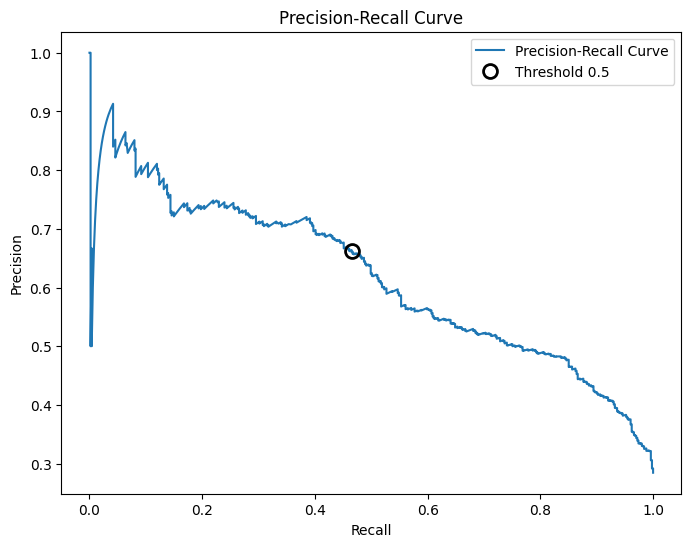

In [41]:
# Label the axis and create a legend
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
# Mark the point that corresponds to a threshold of 0.5
plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
         label='Threshold 0.5', fillstyle="none", c='k', mew=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [49]:
# Calculate the F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall) #this will create an array of each pair of recall and precision
# Find the index of the highest F1 score
best_f1_index = np.argmax(f1_scores) #get the best f1_score,which represents the best balance between precision and recall for a particular threshold.
# Find the best threshold
best_threshold = thresholds[best_f1_index]
best_threshold

0.2125169845600398

In [50]:
f1_scores

array([0.44297082, 0.44316674, 0.4435591 , ..., 0.00397614, 0.00398406,
       0.        ])

In [45]:
# apply the new threshold to make predictions 
new_predictions = (probabilities >= best_threshold).astype(int)
new_predictions

array([0, 0, 1, ..., 0, 1, 1])

In [46]:
#evaluate the model with new predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, new_predictions))


              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1260
           1       0.48      0.84      0.61       501

    accuracy                           0.70      1761
   macro avg       0.70      0.74      0.68      1761
weighted avg       0.79      0.70      0.71      1761



In [47]:
print("precision: ",precision_score(y_test,new_predictions))
print("recall: ",recall_score(y_test,new_predictions))
print("f1: ",f1_score(y_test,new_predictions))

precision:  0.48068181818181815
recall:  0.844311377245509
f1:  0.6125995655322231


Below i have before SMOTE, after SMOTE and then with SMOTE and adjusting the threshold.

* precision = 0.645 | precision: 0.491 | precision 0.48
* recall = 0.441 | recall: 0.746 | recall 0.84
* f1 = 0.524 | f1: 0.593 | 0.612